In [48]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.font_manager as fm
import os

In [2]:
df = pd.read_csv("C:/Users/44773/Documents/sarge-sainz-new.csv")

In [4]:
df.drop(columns=['Unnamed: 7', 'Unnamed: 8'], inplace=True)

In [6]:
df.rename(columns={'Shot/90':'Shots'}, inplace=True)

findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not

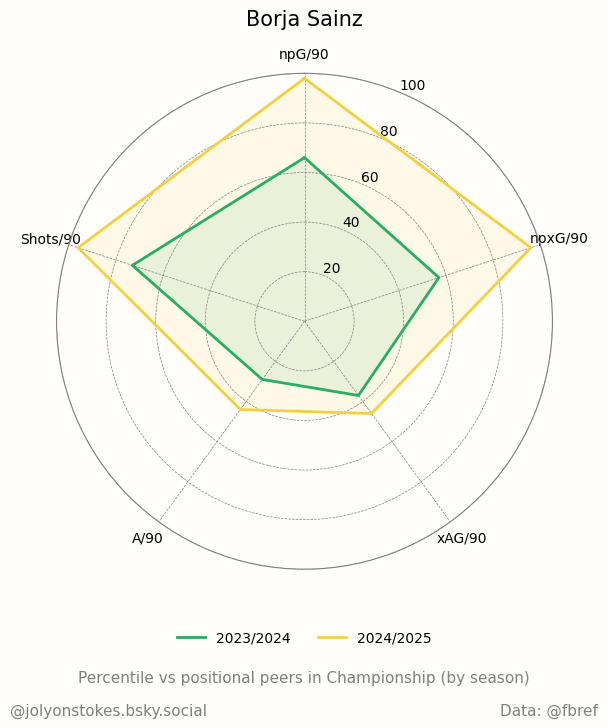

findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not

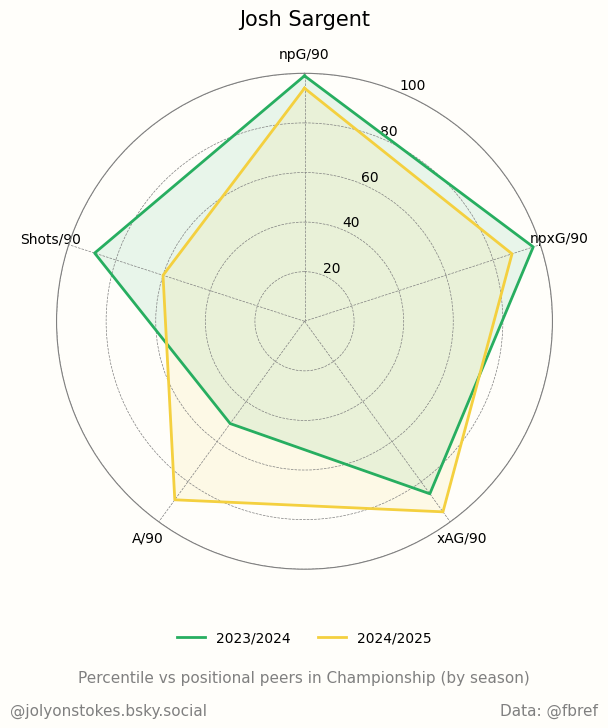

In [63]:
# Color scheme for seasons
color_map = {
    '2024/2025': "#f4d03f",  # Yellow
    '2023/2024': "#27ae60"   # Green
}

cream_hex = '#FFFEFA'

# Metrics to use in the radar chart
metric_cols = [col for col in df.columns if col not in ['Season', 'Player']]
metrics = [col+'/90' for col in metric_cols]
labels = metrics

# Calculate angles for the radar chart
angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False).tolist()
angles += angles[:1]  # Repeat first angle to close the loop

# Unique players
unique_players = df['Player'].unique()
save_dir = "C:/Users/44773/Documents/PlayerRadarCharts"
os.makedirs(save_dir, exist_ok=True)
# Plot radar chart for each player separately
for player in unique_players:
    fig, ax = plt.subplots(figsize=(6, 8), subplot_kw=dict(polar=True))
    fig.patch.set_facecolor(cream_hex)
    ax.set_facecolor(cream_hex)

    player_rows = df[df['Player'] == player]
    for _, row in player_rows.iterrows():
        values = row[metric_cols].tolist() + [row[metric_cols[0]]]  # Close the loop
        season = row['Season']
        label = f"{season}"
        color = color_map.get(season, 'gray')
        ax.plot(angles, values, label=label, linewidth=2, color=color)
        ax.fill(angles, values, alpha=0.1, color=color)

   # Titles & Axis
    ax.set_title(f"{player}", fontsize=15, y=1.08)
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    ax.set_thetagrids(np.degrees(angles[:-1]), labels, fontsize=10)
    ax.set_ylim(0, 100)
    ax.grid(True, linestyle='--', linewidth=0.5, color='gray')
    ax.spines['polar'].set_color('gray')

    # Legend - cleaner placement
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2, frameon=False)

    # Caption inside chart
    fig.text(0.5, 0.05, "Percentile vs positional peers in Championship (by season)", 
             ha='center', fontsize=11, color='gray')

    # Watermark text
    fig.text(0.01, 0.01, "@jolyonstokes.bsky.social", fontsize=11, color='gray', ha='left')
    fig.text(0.99, 0.01, "Data: @fbref", fontsize=11, color='gray', ha='right')
    filename = f"{player.replace(' ', '_')}_radar.png"
    filepath = os.path.join(save_dir, filename)
    plt.savefig(filepath, dpi=300, format='png', bbox_inches='tight', facecolor=cream_hex)

    plt.tight_layout()
    plt.show()
